In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data prep for simulation

## BSM flow by 5 minutes

In [2]:
bsm_data_train = pd.read_csv('data/train/bsm_data_train.csv')
bsm_data_test = pd.read_csv('data/test/bsm_data_test_outliers.csv')

bsm_data_train['MessageReceivedDate'] = pd.to_datetime(bsm_data_train['MessageReceivedDate'])
bsm_data_test['MessageReceivedDate'] = pd.to_datetime(bsm_data_test['MessageReceivedDate'])

combined_bsm_data = pd.concat([bsm_data_train, bsm_data_test], ignore_index=True)
combined_bsm_data = combined_bsm_data.sort_values(by=['MessageReceivedDate'],ignore_index=True)

ground_truth = combined_bsm_data.groupby(pd.Grouper(key='MessageReceivedDate', freq='5T')).size().reset_index(name='count')
ground_truth.rename(columns={'MessageReceivedDate': 'timestamp'}, inplace=True)
ground_truth = ground_truth.sort_values(by=['timestamp'],ignore_index=True)
ground_truth.head()

C:\Users\lebed\AppData\Local\Temp\ipykernel_10544\1188712796.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ground_truth = combined_bsm_data.groupby(pd.Grouper(key='MessageReceivedDate', freq='5T')).size().reset_index(name='count')


timestamp  count
0 2023-07-01 00:00:00    100
1 2023-07-01 00:05:00     89
2 2023-07-01 00:10:00    125
3 2023-07-01 00:15:00    123
4 2023-07-01 00:20:00    122

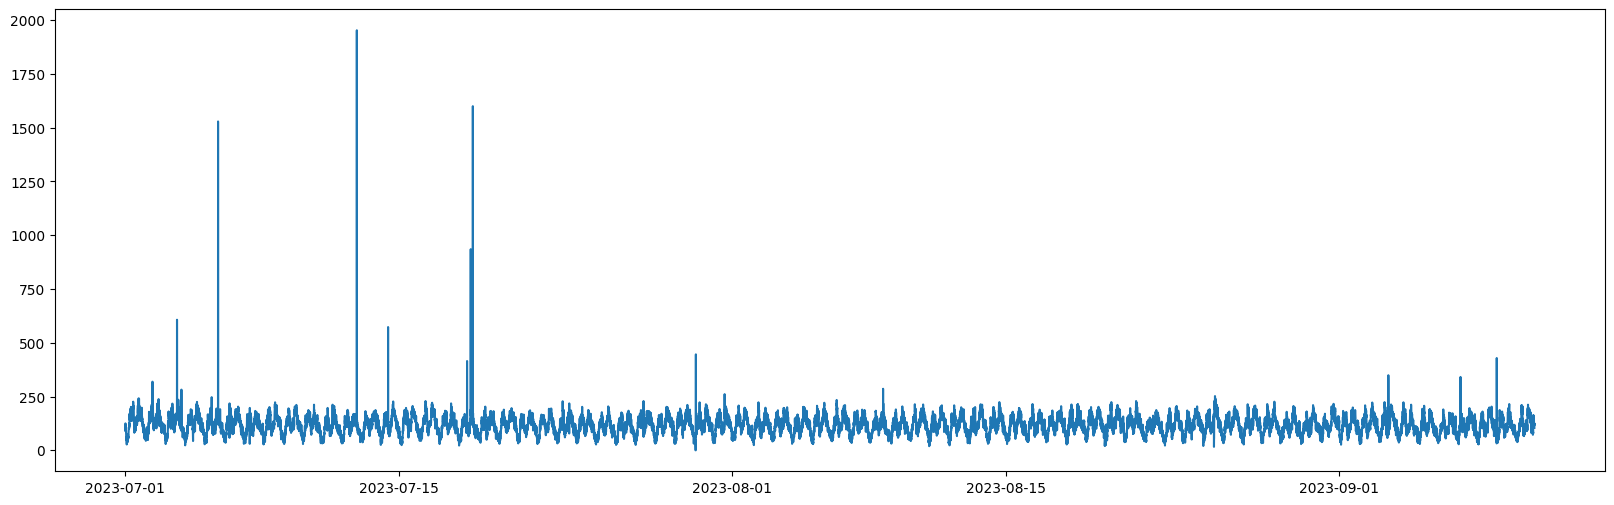

In [3]:
plt.figure(figsize=(20, 6))
plt.plot(ground_truth['timestamp'], ground_truth['count'])
plt.show()

## Anomalies by 5 minutes

In [4]:
y_train = pd.read_csv('data/tmp/train_y.csv',usecols=['timestamp', 'actualAnomaly'])
y_test = pd.read_csv('data/tmp/test_y.csv',usecols=['timestamp', 'actualAnomaly'])

y_train['timestamp'] = pd.to_datetime(y_train['timestamp'])
y_test['timestamp'] = pd.to_datetime(y_test['timestamp'])

combined_anomalies = pd.concat([y_train, y_test], ignore_index=True)
combined_anomalies = combined_anomalies.sort_values(by=['timestamp'],ignore_index=True)

combined_anomalies = combined_anomalies.groupby(pd.Grouper(key='timestamp', freq='5T'))["actualAnomaly"].sum().reset_index(name='actualAnomaly')
combined_anomalies['actualAnomaly'] = combined_anomalies['actualAnomaly'].apply(lambda x: 1 if x >= 1 else 0)
combined_anomalies["actualAnomaly"].value_counts()

C:\Users\lebed\AppData\Local\Temp\ipykernel_10544\3443619638.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  combined_anomalies = combined_anomalies.groupby(pd.Grouper(key='timestamp', freq='5T'))["actualAnomaly"].sum().reset_index(name='actualAnomaly')


actualAnomaly
0    20686
1       50
Name: count, dtype: int64

## Arrival distribution dictionray (profile_value_dict)

In [91]:
profile_value_dict = pd.read_csv('data/train/arrival_profile_value.csv')
profile_value_dict['value'] = profile_value_dict['value'].apply(lambda x: round(x, 6))
profile_value_dict

checkin_terminal              airline_grouped_hash  arrival_profile  \
0                   B  7bac920cc30511dfb81ca2242b293990            180.0   
1                   B  7bac920cc30511dfb81ca2242b293990            185.0   
2                   B  7bac920cc30511dfb81ca2242b293990            190.0   
3                   B  7bac920cc30511dfb81ca2242b293990            195.0   
4                   B  7bac920cc30511dfb81ca2242b293990            200.0   
...               ...                               ...              ...   
1315                C  4bba3ab232fc6c57e7dbb1f5932b61d0            140.0   
1316                C  4bba3ab232fc6c57e7dbb1f5932b61d0            145.0   
1317                C  4bba3ab232fc6c57e7dbb1f5932b61d0            150.0   
1318                C  4bba3ab232fc6c57e7dbb1f5932b61d0            155.0   
1319                C  4bba3ab232fc6c57e7dbb1f5932b61d0            160.0   

         value season  
0     0.008569    S23  
1     0.008135    S23  
2     0.007548    S23  
3     0.007107    S23  
4     0.006526    S23  
...        ...    ...  
1315  0.038291    S23  
1316  0.034149    S23  
1317  0.035884    S23  
1318  0.032785    S23  
1319  0.031969    S23  

[1320 rows x 5 columns]

1.0 0.0


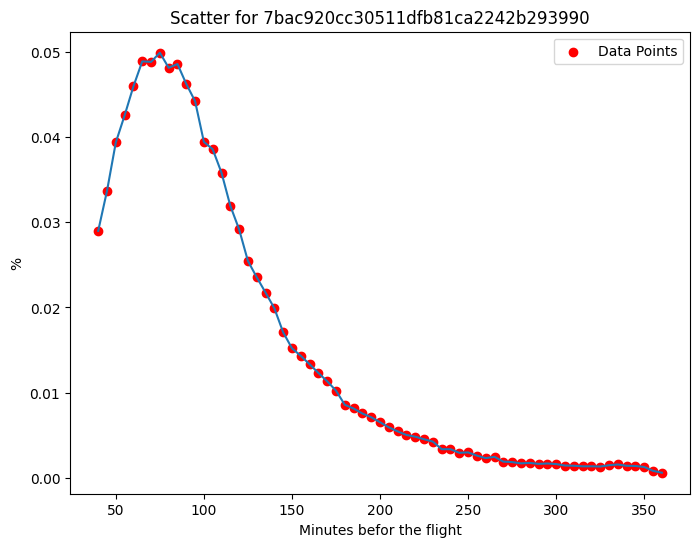

1.0000000000000002 -0.0


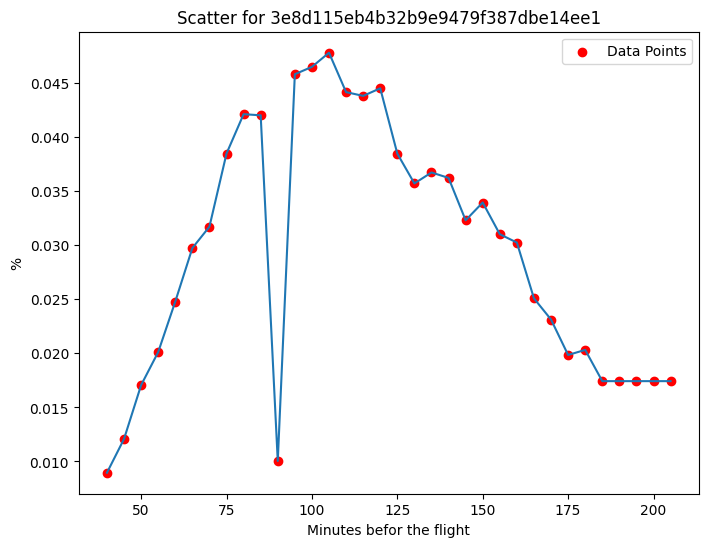

1.0 0.0


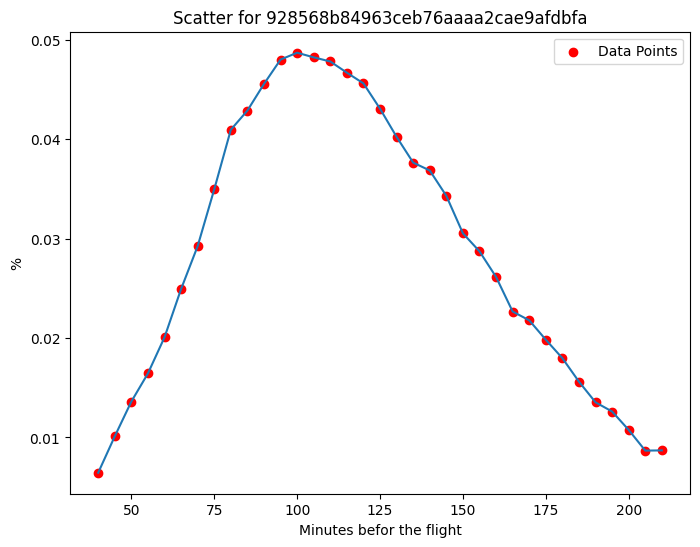

1.0 0.0


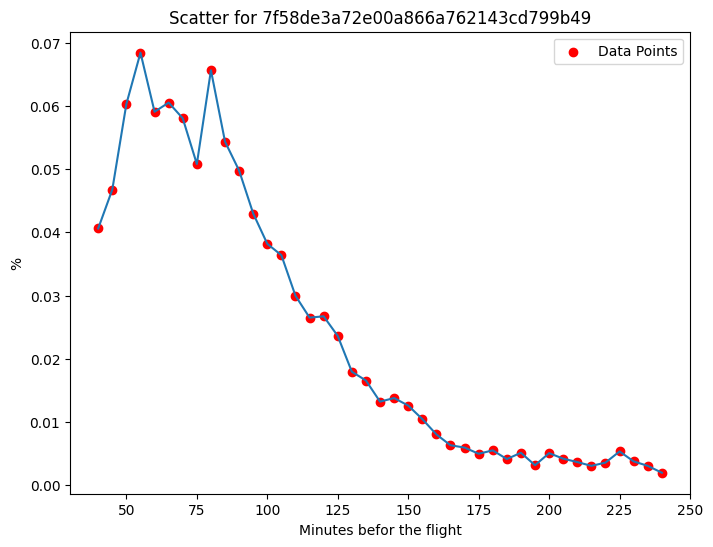

1.0 0.0


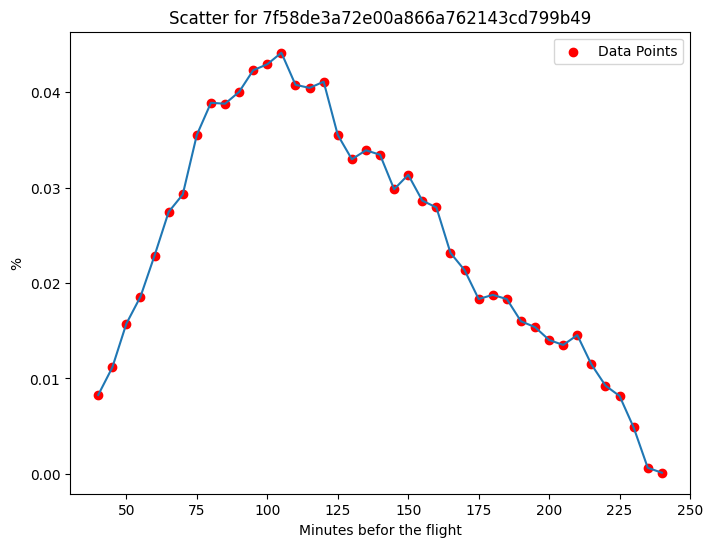

1.0 0.0


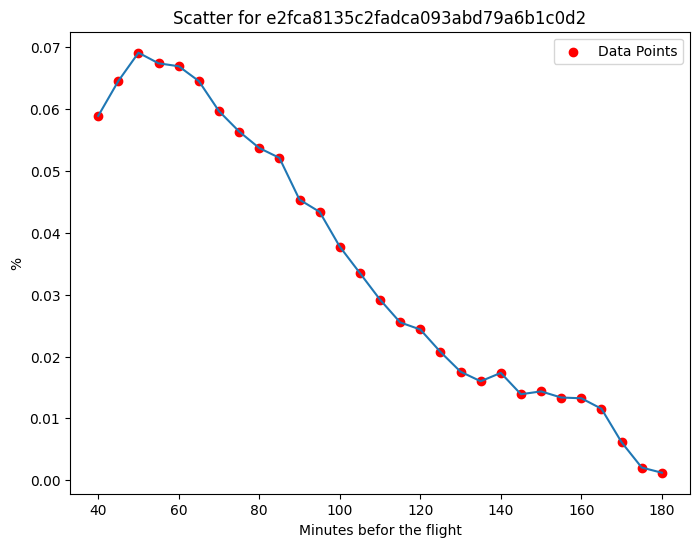

1.0 0.0


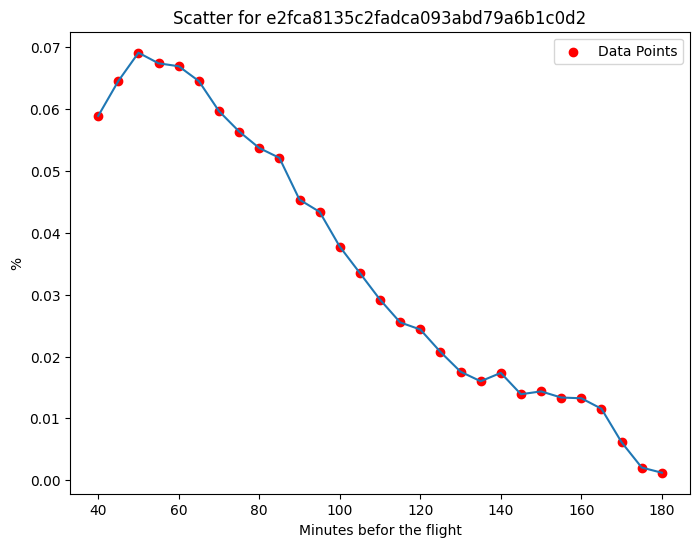

1.0 0.0


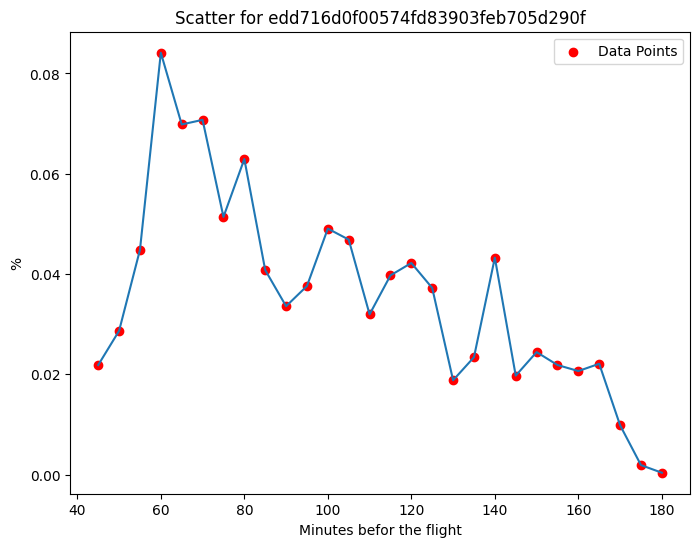

1.0 0.0


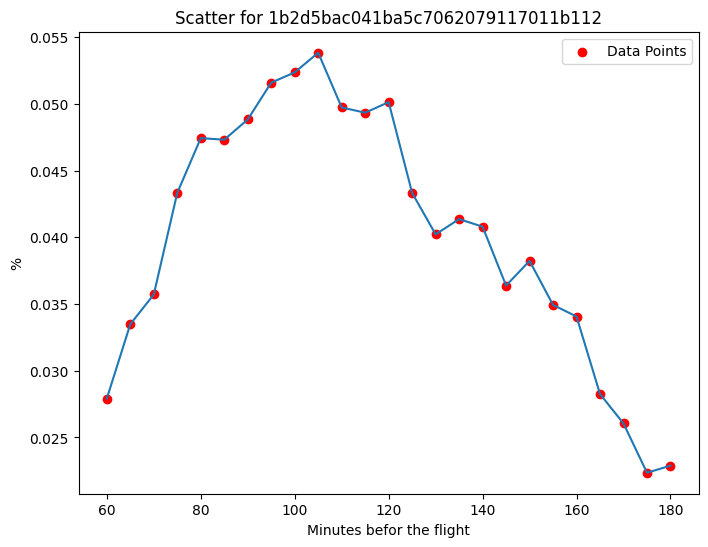

1.0 0.0


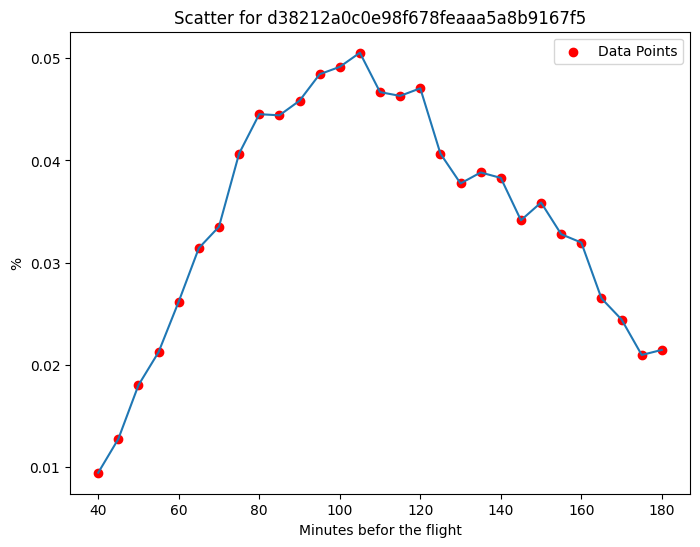

1.0 0.0


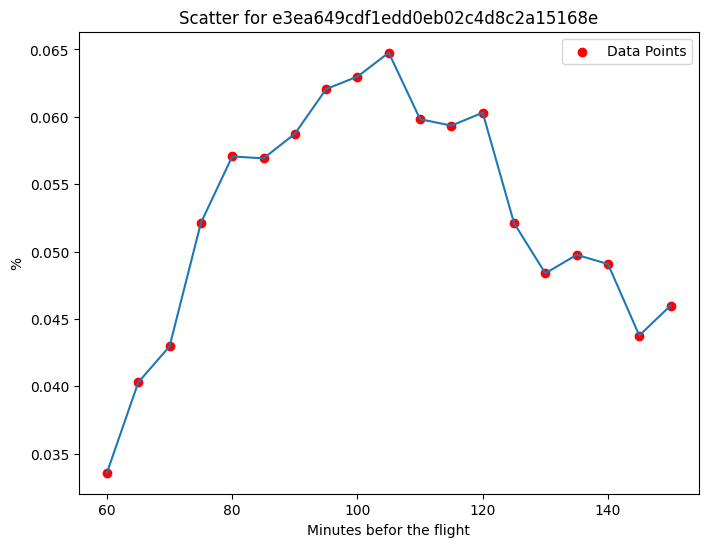

1.0 0.0


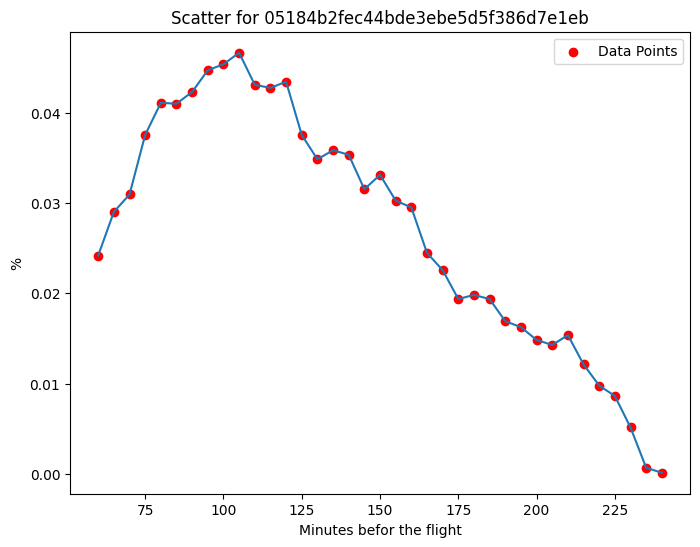

1.0 0.0


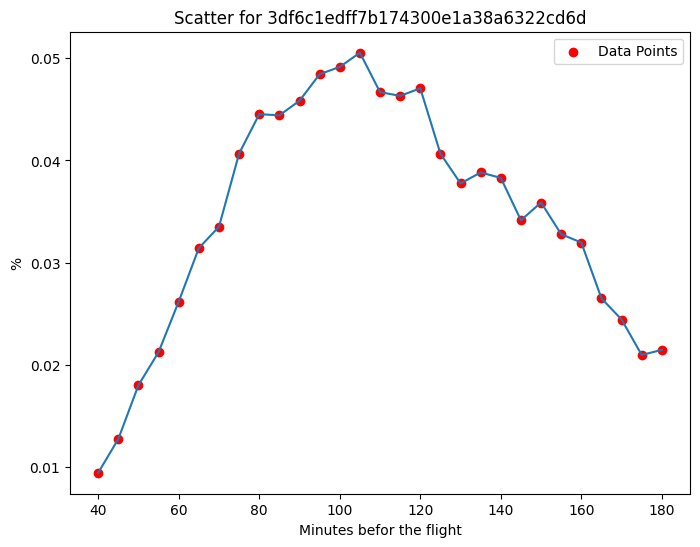

1.0 0.0


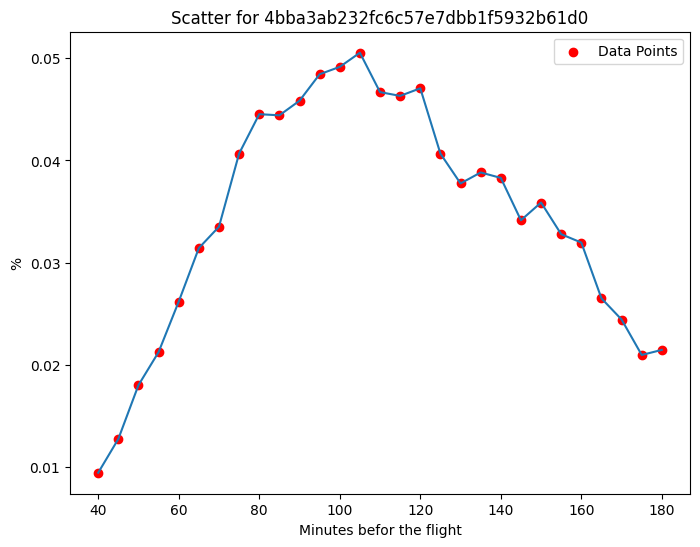

0.9999999999999999 0.0


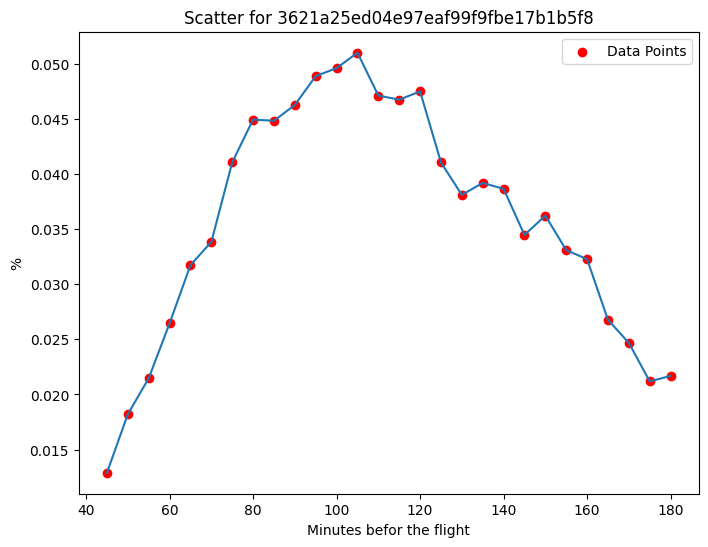

1.0 0.0


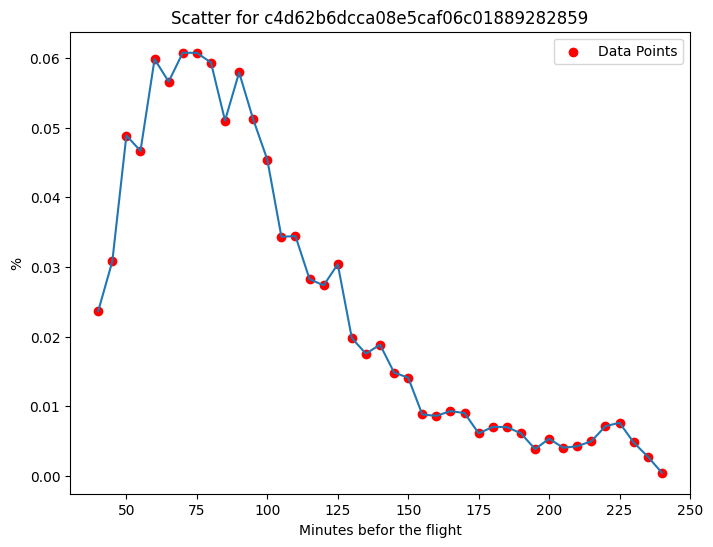

0.9999999999999998 0.0


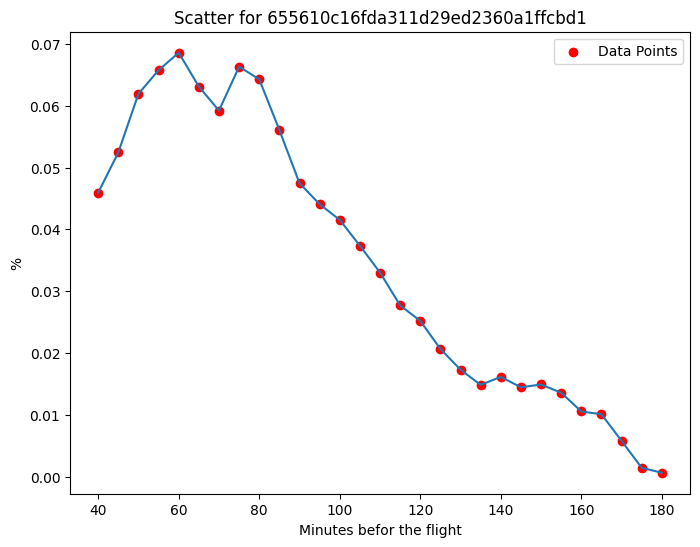

1.0 0.0


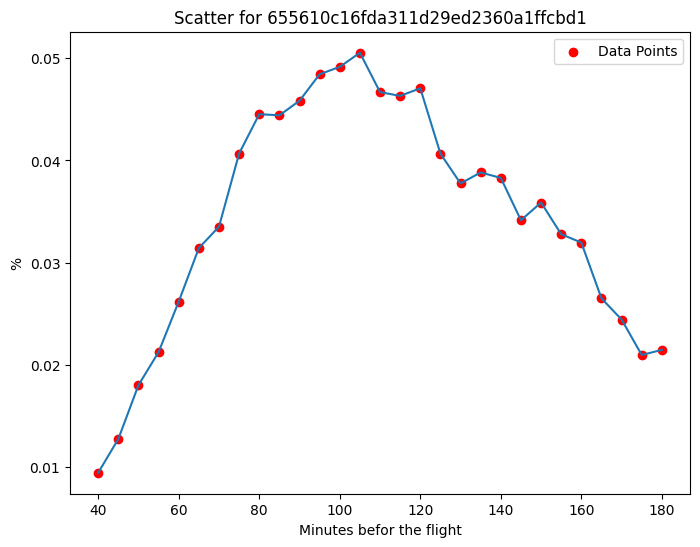

0.9999999999999999 0.0


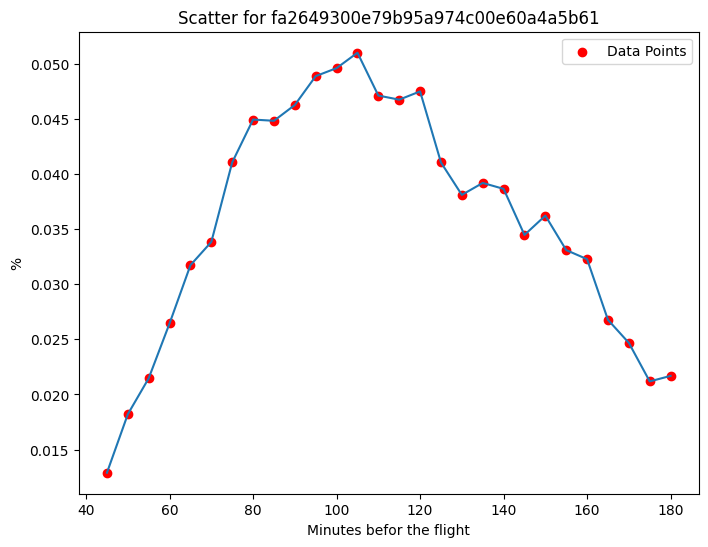

1.0 0.0


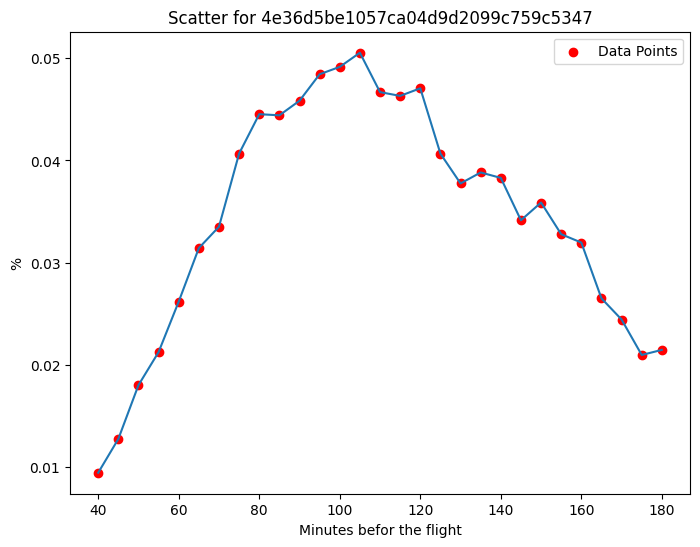

1.0 0.0


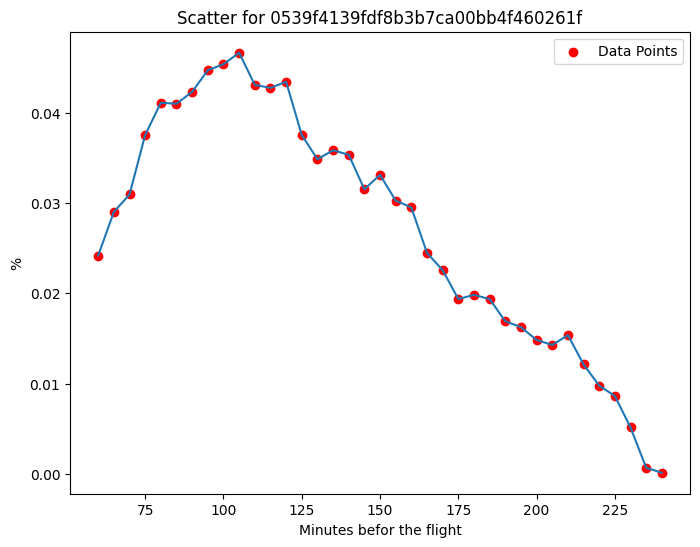

1.0 0.0


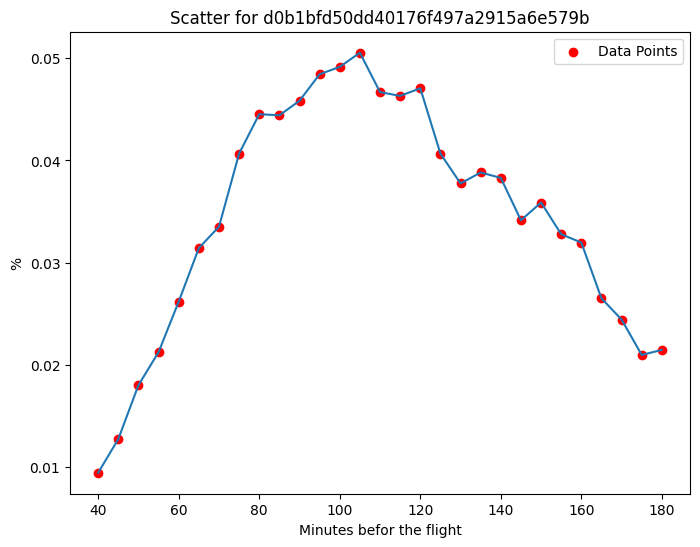

1.0 0.0


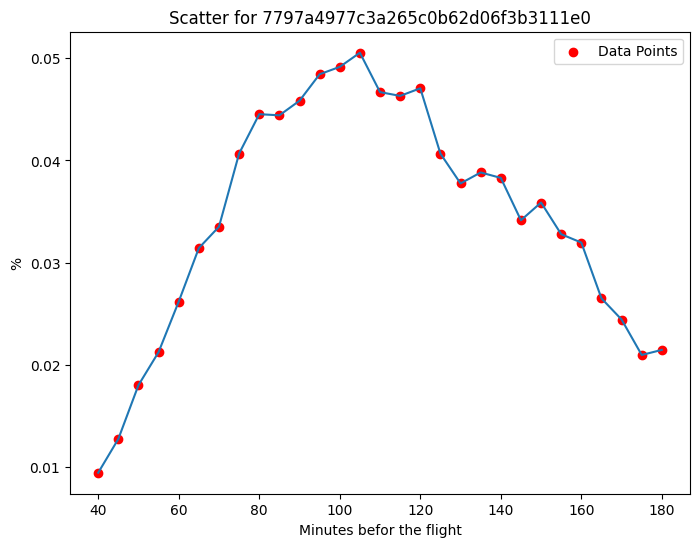

1.0 0.0


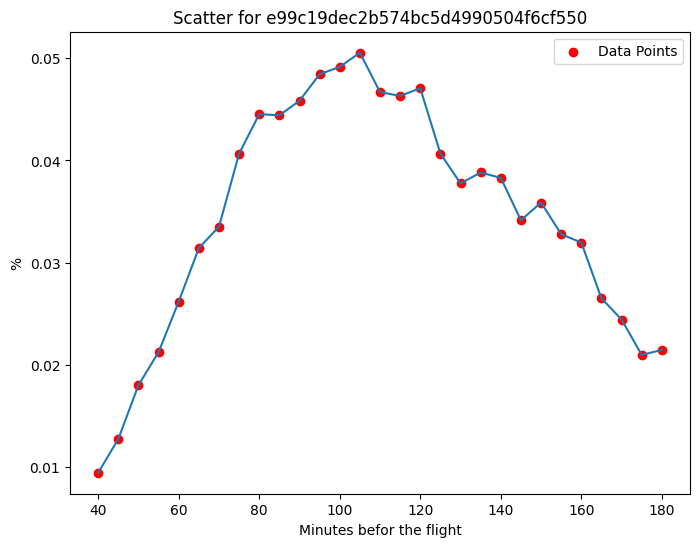

1.0 0.0


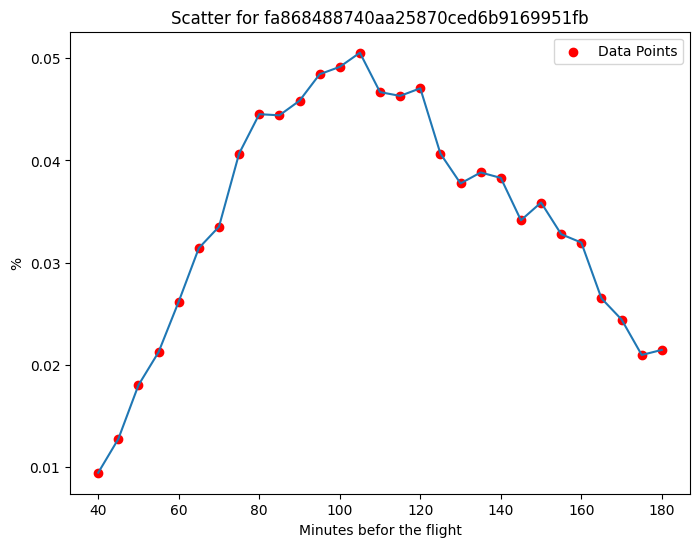

1.0 0.0


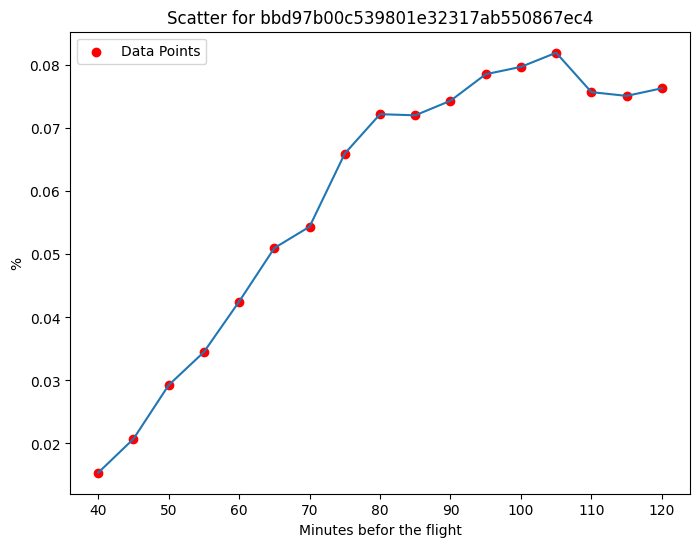

1.0 0.0


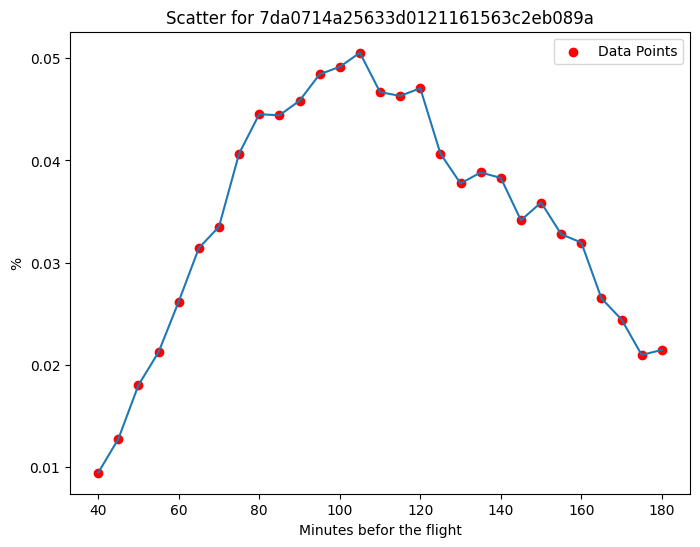

1.0 0.0


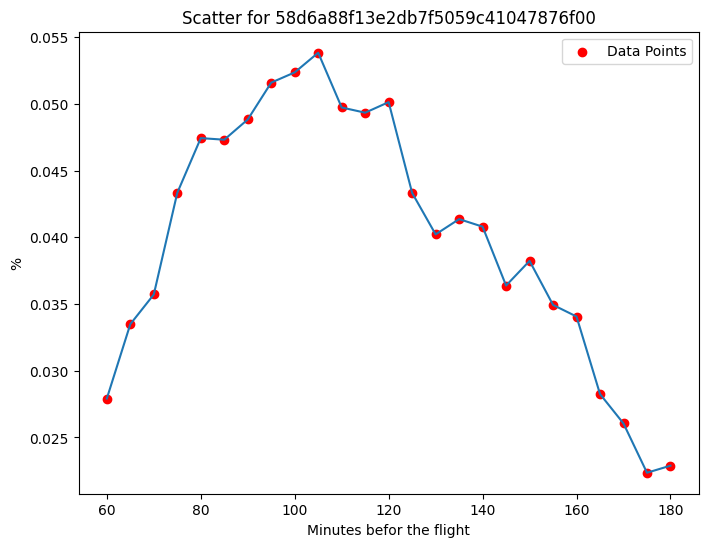

1.0 0.0


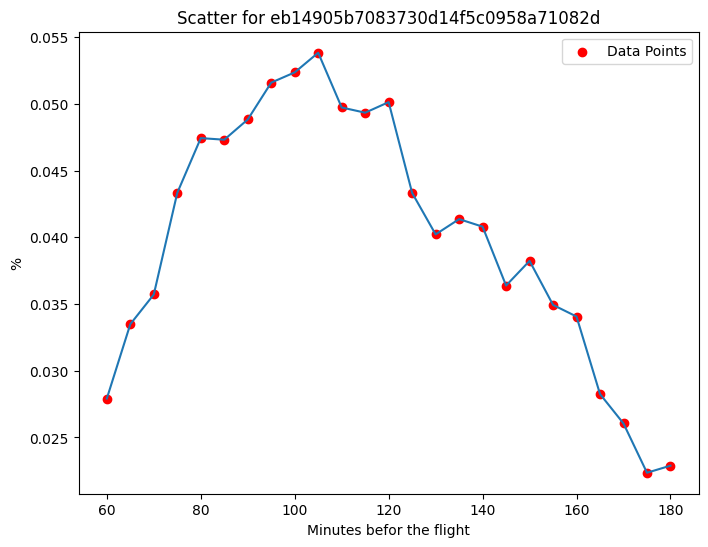

1.0 0.0


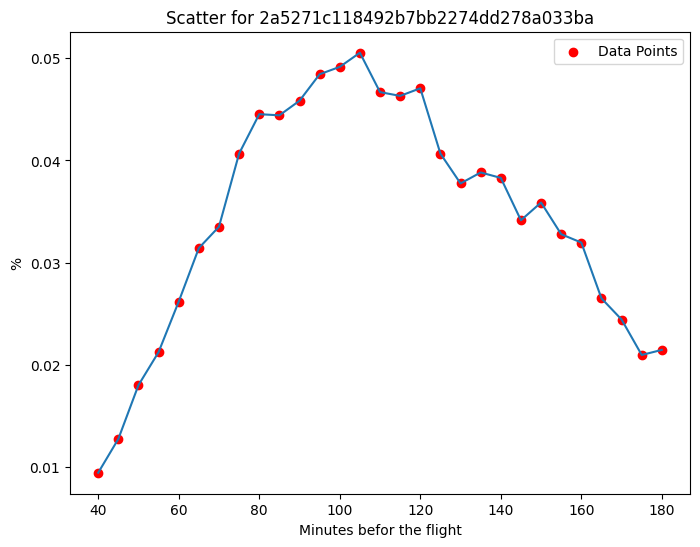

1.0 0.0


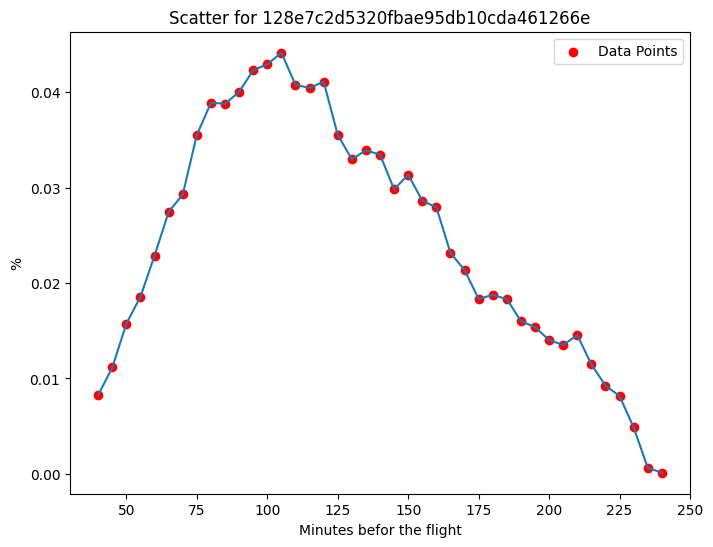

0.9999999999999999 0.0


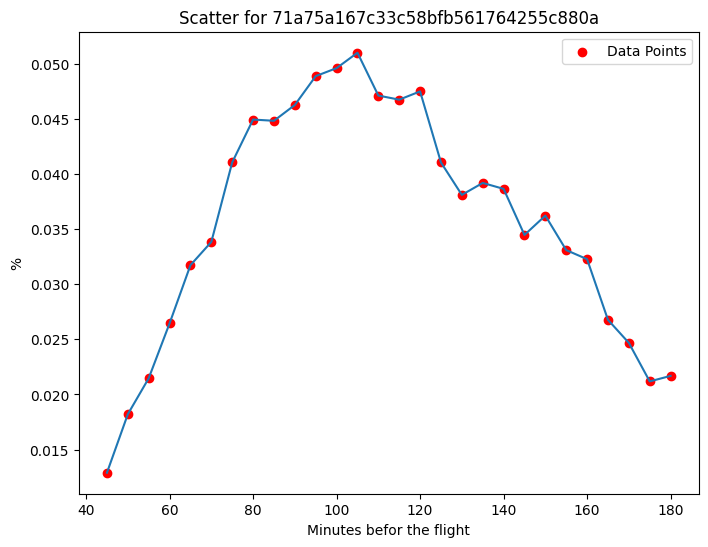

1.0 0.0


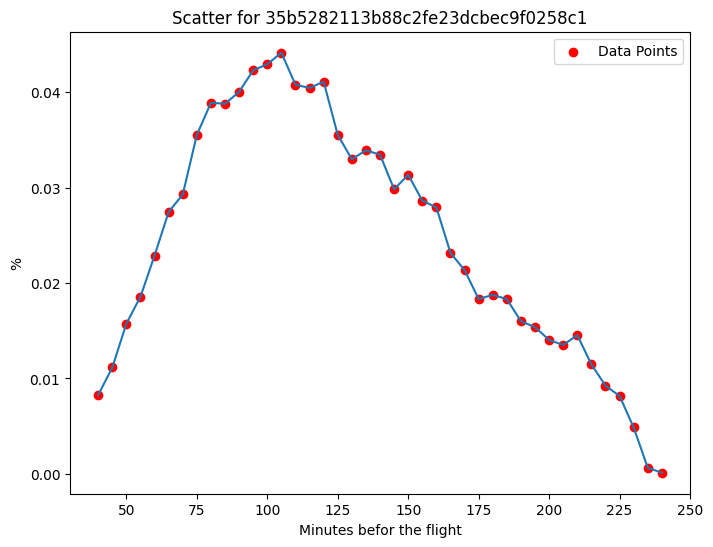

1.0 0.0


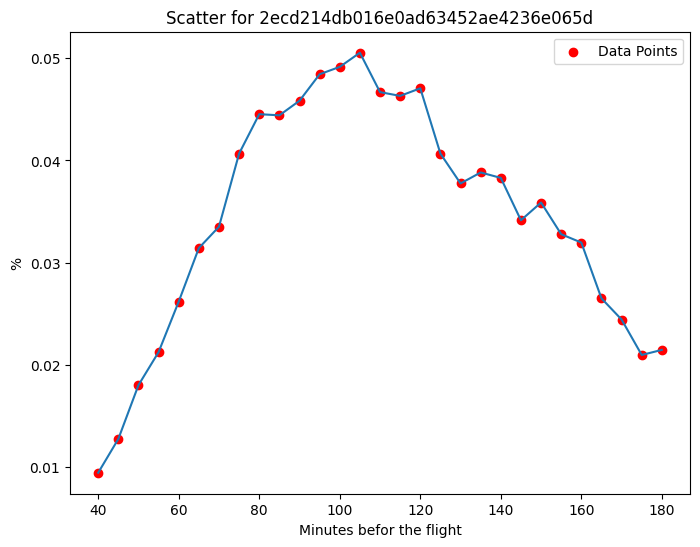

1.0 0.0


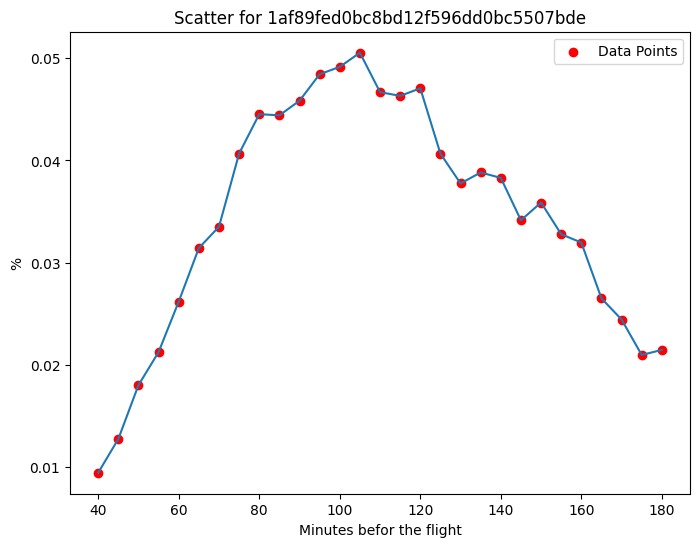

1.0 0.0


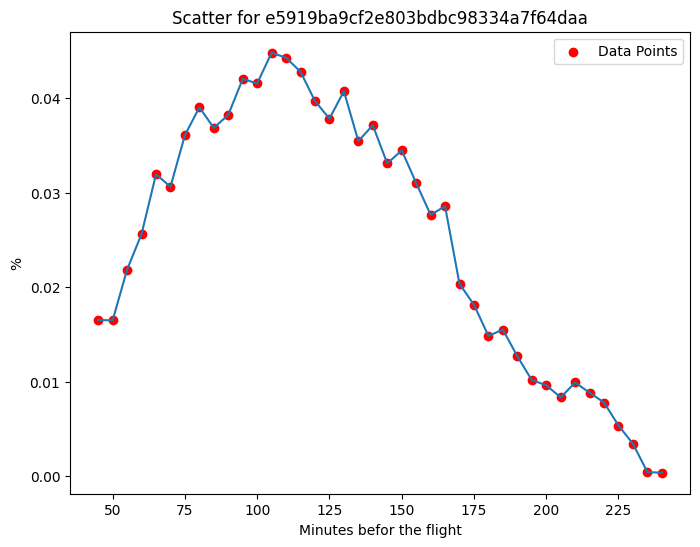

1.0 0.0


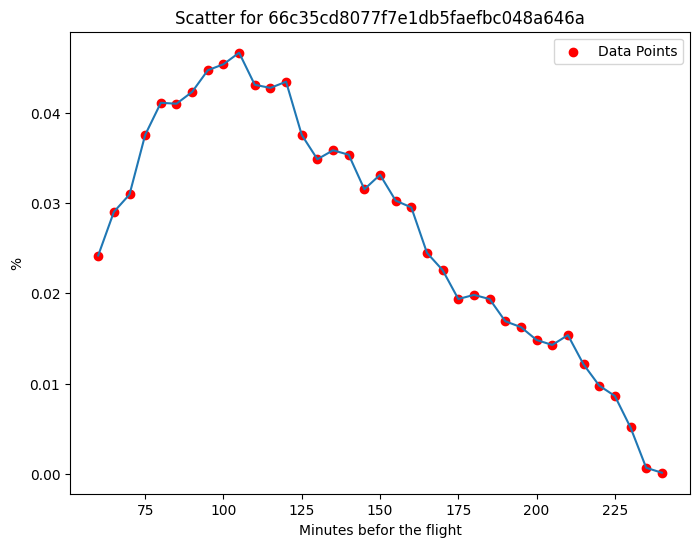

1.0 0.0


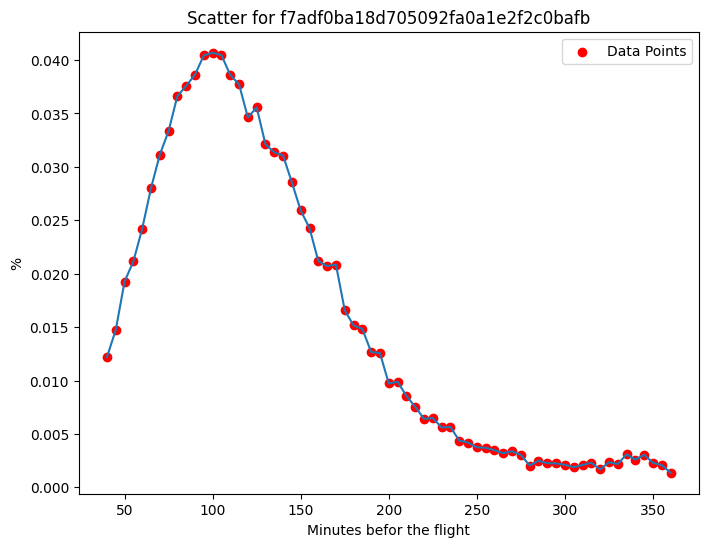

0.9999999999999999 0.0


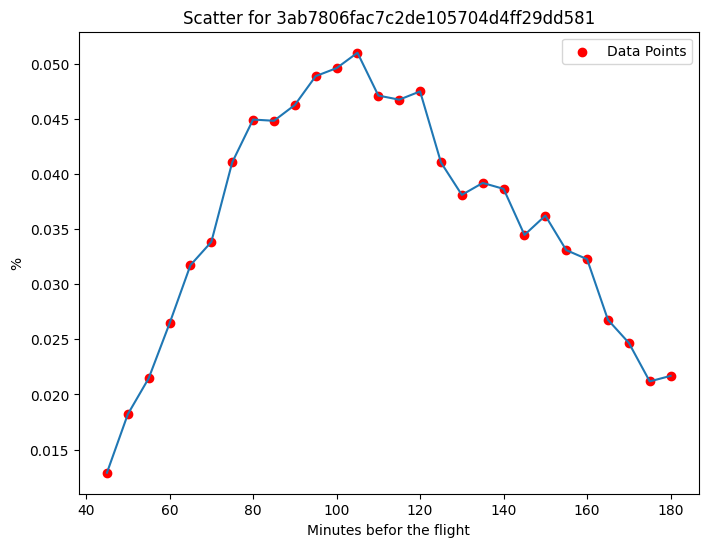

1.0 0.0


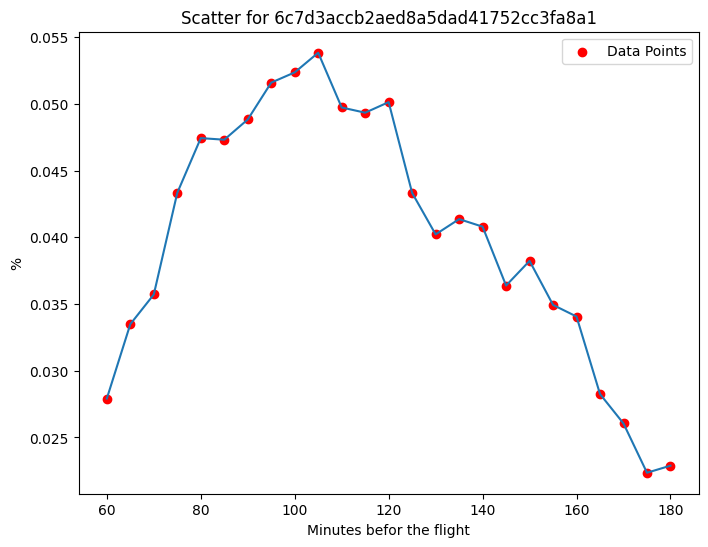

1.0 0.0


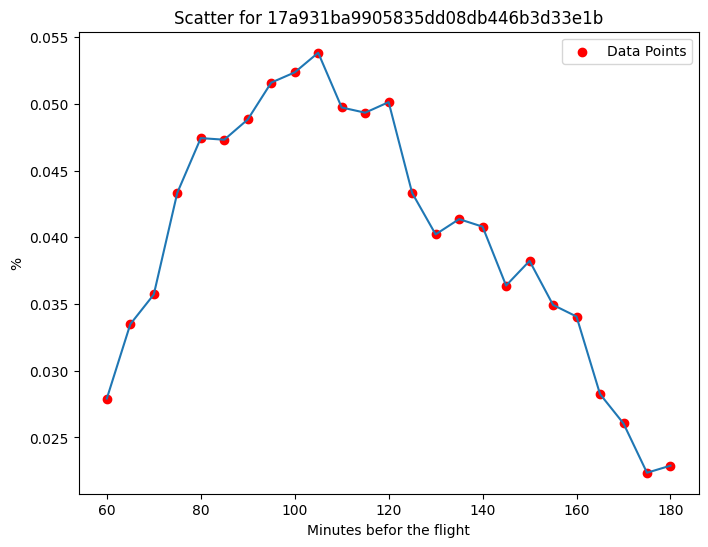

In [94]:
diff_airlines_test = profile_value_dict['airline_grouped_hash'].unique()
diff_terminals_test = profile_value_dict['checkin_terminal'].unique()
for airline_group in diff_airlines_test:
    for terminal in diff_terminals_test:
        distribution_test = profile_value_dict.loc[(profile_value_dict['airline_grouped_hash'] == airline_group)
                                                   & (profile_value_dict['checkin_terminal'] == terminal)]
        if distribution_test.size != 0:
                distribution_test = distribution_test.sort_values(by=['arrival_profile'],ignore_index=True)
                distribution_test.at[10, 'value'] += round(1 - distribution_test['value'].sum(),6)
                print(distribution_test['value'].sum(), round(1 - distribution_test['value'].sum(),6))
                plt.figure(figsize=(8, 6))
                plt.plot(distribution_test['arrival_profile'], distribution_test['value'])
                plt.scatter(distribution_test['arrival_profile'], distribution_test['value'], label='Data Points', c='red')
                plt.xlabel('Minutes befor the flight')
                plt.ylabel('%')
                plt.title('Scatter for ' + airline_group)
                plt.legend()
                plt.show()

## Bag number distribution dictionary (bag_dist_dict)

In [8]:
rasp = pd.read_csv('data/train/flight_rasp_data.csv')
rasp['t_st'] = pd.to_datetime(rasp['t_st'])

In [9]:
extended_combined_bsm = pd.merge(combined_bsm_data, rasp, on='i_id', how='left')
extended_combined_bsm
df_grouped = extended_combined_bsm.groupby(['pax_id_hash', 'airline_grouped_hash', 'm_city_rus2']).size().reset_index(name='count')
df_grouped['count'].value_counts()

count
1     1826669
2      219988
3       25286
4       13070
5        2186
6        1111
8         320
7          80
10         45
9          25
Name: count, dtype: int64

In [10]:
bag_dist_dict = df_grouped.groupby([ 'airline_grouped_hash', 'm_city_rus2', 'count']).size().reset_index(name='count_cases')
bag_dist_dict.rename(columns={'count': 'number_of_bags'}, inplace=True)
bag_dist_dict.head()

airline_grouped_hash m_city_rus2  number_of_bags  count_cases
0  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               1        10043
1  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               2         1964
2  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               3          466
3  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               4          127
4  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               5           41

In [11]:
grouped_by_airline_drection = bag_dist_dict.groupby(['airline_grouped_hash', 'm_city_rus2'])
total_count_cases = grouped_by_airline_drection['count_cases'].transform('sum')
bag_dist_dict['percentage'] = bag_dist_dict['count_cases'] / total_count_cases
bag_dist_dict.head(10)

airline_grouped_hash m_city_rus2  number_of_bags  count_cases  \
0  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               1        10043   
1  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               2         1964   
2  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               3          466   
3  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               4          127   
4  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               5           41   
5  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               6           10   
6  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               7            2   
7  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат               8            1   
8  05184b2fec44bde3ebe5d5f386d7e1eb      Маскат              10            1   
9  100d796971d49bd1046f553b9b942ae7     Анталья               1          270   

   percentage  
0    0.793599  
1    0.155196  
2    0.036823  
3    0.010036  
4    0.003240  
5    0.000790  
6    0.000158  
7    0.000079  
8    0.000079  
9    0.944056

# Main simulation

In [95]:
dict_results = {}

def estimate_time(checkin_terminal, airline_grouped_hash):
    global profile_value_dict
    distribution = profile_value_dict.loc[(profile_value_dict['checkin_terminal'] == checkin_terminal) &
                                          (profile_value_dict['airline_grouped_hash'] == airline_grouped_hash)]
    
    distribution = distribution.sort_values(by=['arrival_profile'],ignore_index=True)
    distribution.at[10, 'value'] += round(1 - distribution['value'].sum(),6)
    print('estimate_time' + airline_grouped_hash)
    time = np.random.choice(distribution['arrival_profile'], p=distribution['value'])
    return time

def estimate_bags(airline_grouped_hash, m_city_rus2):
    global bag_dist_dict
    distribution = bag_dist_dict.loc[(bag_dist_dict['airline_grouped_hash'] == airline_grouped_hash) &
                                     (bag_dist_dict['m_city_rus2'] == m_city_rus2)]
    
    distribution = distribution.sort_values(by=['number_of_bags'],ignore_index=True)
    distribution.at[0, 'percentage'] += round(1 - distribution['percentage'].sum(),6)
    print('estimate_bags')
    number_of_bags = np.random.choice(distribution['number_of_bags'], p=distribution['percentage'])
    return number_of_bags

def row_application(row):
    global dict_results
    for i in range(int(row['config'])):
        time_shift = estimate_time(row['checkin_terminal'], row['airline_grouped_hash'])
        number_of_bags = estimate_bags(row['airline_grouped_hash'], row['m_city_rus2'])
        time = str(row['t_st'] - pd.Timedelta(minutes=time_shift))
        if time in dict_results:
            dict_results[time] += number_of_bags


def simulation(rasp_test, start_ts, end_ts):
    global dict_results
    estimation_rasp = rasp_test.loc[(rasp_test['t_st'] >= pd.Timestamp(start_ts)) 
                            & (rasp_test['t_st'] <= pd.Timestamp(end_ts) + pd.Timedelta(hours=12))]
    
    prediction = rasp_test.loc[(rasp_test['t_st'] >= pd.Timestamp(start_ts)) 
                            & (rasp_test['t_st'] <= pd.Timestamp(end_ts))]
    dict_results = {str(key): 0 for key in prediction['t_st']}
    estimation_rasp.apply(row_application, axis=1)
    #print(type(dict_results))


rasp_T = pd.read_csv('data/train/flight_rasp_data.csv')
rasp_T['t_st'] = pd.to_datetime(rasp_T['t_st'])
rasp_T = rasp_T.drop(['i_id','departure_terminal', 'cco_hash', 'flt_hash', 'm_city_rus1'], axis=1)

simulation(rasp_T, '2023-09-03T12', '2023-09-03T14')

estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b293990
estimate_bags
estimate_time7bac920cc30511dfb81ca2242b2

In [96]:
dict_results

{'2023-09-03 12:05:00': 197,
 '2023-09-03 12:10:00': 215,
 '2023-09-03 12:25:00': 229,
 '2023-09-03 12:35:00': 217,
 '2023-09-03 12:40:00': 246,
 '2023-09-03 12:50:00': 239,
 '2023-09-03 12:55:00': 289,
 '2023-09-03 13:05:00': 256,
 '2023-09-03 13:25:00': 243,
 '2023-09-03 13:30:00': 242,
 '2023-09-03 13:35:00': 280,
 '2023-09-03 13:40:00': 274,
 '2023-09-03 13:50:00': 270,
 '2023-09-03 13:55:00': 245,
 '2023-09-03 14:00:00': 244,
 '2023-09-03 12:00:00': 187}

In [52]:
#Tables with number of BSMs per minute
df_train = pd.read_csv('data/tmp/df_grouped.csv')
df_test = pd.read_csv('data/tmp/df_grouped_test.csv')


df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'])


df_combined = pd.concat([df_train, df_test], ignore_index=True)



df_combined = df_combined.drop(columns=['minute'])
df_combined = df_combined.sort_values(by=['timestamp'],ignore_index=True)


#Tables with BSM inflow to dentify the number of bags per person
bsm_data_train = pd.read_csv('data/train/bsm_data_train.csv')
bsm_data_test = pd.read_csv('data/test/bsm_data_test_outliers.csv')

combined_bsm_data = pd.concat([bsm_data_train, bsm_data_test], ignore_index=True)

#planned flight schedule


In [16]:
def print_config(row):
    print(row['config'])

rasp_T = pd.read_csv('data/train/flight_rasp_data.csv')
rasp_T['t_st'] = pd.to_datetime(rasp_T['t_st'])
rasp_T = rasp_T.drop(['i_id','departure_terminal', 'cco_hash', 'flt_hash', 'm_city_rus1'], axis=1)
rasp_T.apply(print_config)

KeyError: 'config'

In [ ]:
diff_airlines = profile_value['airline_grouped_hash'].unique()
for x in diff_airlines:
    testing = profile_value.loc[profile_value['airline_grouped_hash'] == x]
    testing = testing.sort_values(by=['arrival_profile'],ignore_index=True)

    # Creating the scatter plot
    plt.figure(figsize=(8, 6))
    plt.plot(testing['arrival_profile'], testing['value'], label='Data Points')
    plt.scatter(testing['arrival_profile'], testing['value'], label='Data Points', c='red')

    # Adding labels and title
    plt.xlabel('Number')
    plt.ylabel('Value')
    plt.title('Scatter for ' + x)
    plt.legend()

    # Display the plot
    plt.show()
